### Grip @The Sparks Foundation

### Coder : Deepali Aggarwal(Data Science and Business Analytics Intern)

### Task5 : Exploratory Data Analysis - Sports 

(Level - Advanced)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the datasets
dataset1 = pd.read_csv('Indian Premier League/deliveries.csv')
dataset2 = pd.read_csv('Indian Premier League/matches.csv')

In [3]:
dataset1.head(6)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
dataset2.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Each season winner from 2008 to 2019

In [5]:
seasons = dataset2[['id', 'season', 'winner']]
seasons_final = seasons.drop_duplicates(subset = ["season"], keep = "last")
seasons_final[['season', 'winner']].reset_index(drop = True ).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


### Team Performance based on sixes & Fours

Text(0.5, 1.0, 'Team who won maximum matches')

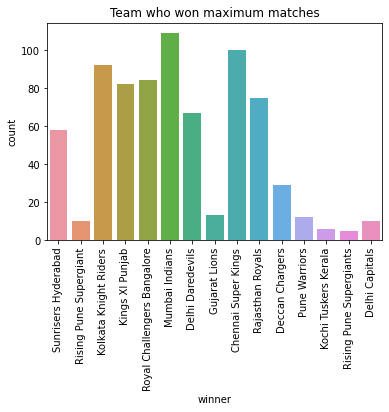

In [6]:
sns.countplot(dataset2['winner'])
plt.xticks(rotation = 90)
plt.title('Team who won maximum matches')

In [7]:
# Fours hit by every team 
fours = dataset1[dataset1["batsman_runs"] == 4]
fours_df = fours.groupby("batting_team")['batsman_runs'].agg([('runs_scored', 'sum'), 
                    ('fours', 'count')]).reset_index().sort_values(by = ['fours'], ascending = False)

Text(0.5, 1.0, 'Fours hit by teams')

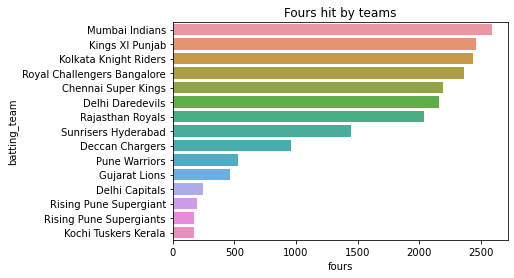

In [8]:
sns.barplot(x = fours_df['fours'], y= fours_df['batting_team'])
plt.title('Fours hit by teams')

In [9]:
#six hit by every team
sixes = dataset1[dataset1["batsman_runs"] == 6]
sixes_df = sixes.groupby("batting_team")["batsman_runs"].agg([('runs_scored', 'sum'), 
            ('sixes', 'count')]).reset_index().sort_values(by = ['sixes'], ascending = False)

Text(0.5, 1.0, 'Sixes hit by teams')

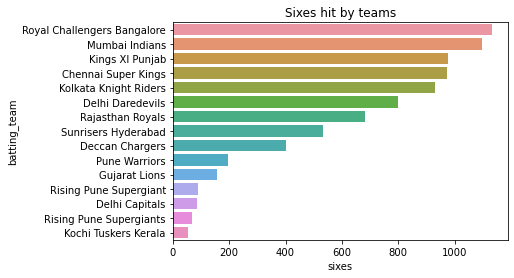

In [10]:
sns.barplot(x = sixes_df['sixes'], y= sixes_df['batting_team'])
plt.title('Sixes hit by teams')

### Batsman's performance based no of sixes & Fours

In [11]:
batsman_sixes = dataset1[dataset1["batsman_runs"] == 6]

batsman_sixes_record = batsman_sixes.groupby("batsman", )["batsman_runs"].agg([('sixes', 'count'),
                    ('runs_scored', 'sum')]).reset_index().sort_values(by = ['sixes'],ascending = False)

batsman_sixes_record = batsman_sixes_record.iloc[:15, :]

<AxesSubplot:xlabel='sixes', ylabel='batsman'>

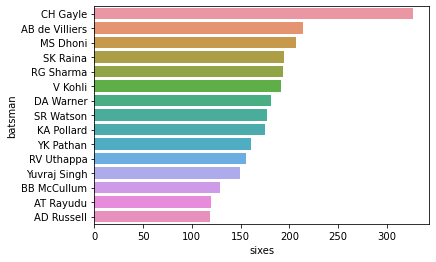

In [12]:
sns.barplot(x = batsman_sixes_record['sixes'], y= batsman_sixes_record['batsman'])

#### No of times player became Player of Match

In [13]:
player_ofMatch_df = dataset2['player_of_match'].value_counts().head(15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'MS Dhoni'),
  Text(4, 0, 'DA Warner'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'MEK Hussey'),
  Text(10, 0, 'AM Rahane'),
  Text(11, 0, 'V Kohli'),
  Text(12, 0, 'V Sehwag'),
  Text(13, 0, 'A Mishra'),
  Text(14, 0, 'AD Russell')])

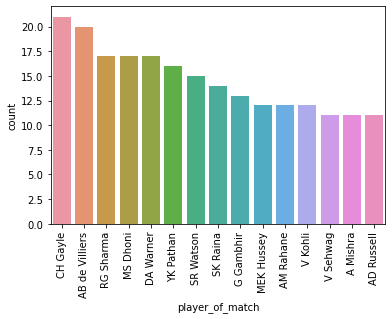

In [14]:
sns.countplot(dataset2['player_of_match'], 
              order=dataset2.player_of_match.value_counts().iloc[:15].index)
plt.xticks(rotation = 90)

#### Total runs scored by each batsman

Text(0.5, 1.0, 'Total runs scored by each batsman')

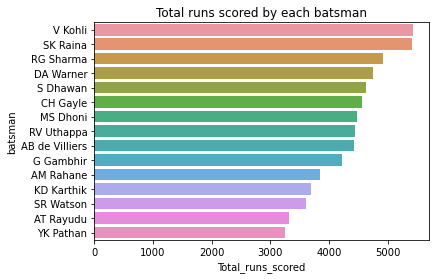

In [15]:
runs_scored_by_batsman = dataset1.groupby("batsman")["batsman_runs"].agg([('Total_runs_scored', 
                                                                'sum')]).reset_index()
runs_df = runs_scored_by_batsman.sort_values('Total_runs_scored', ascending = False).head(15)
sns.barplot(y = runs_df['batsman'], x = runs_df['Total_runs_scored'])
plt.title("Total runs scored by each batsman")

### Toss winners & decisions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

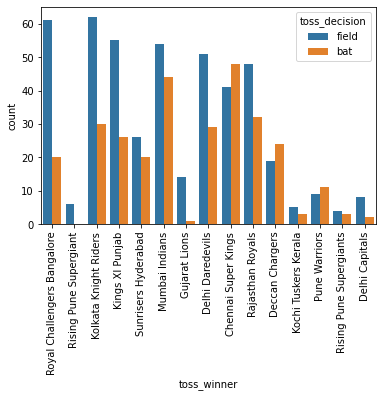

In [16]:
sns.countplot(dataset2['toss_winner'], hue = dataset2['toss_decision'])
plt.xticks(rotation = 90)

### Best bowlers who took maximum wickets

In [17]:
bowler_wickets = dataset1[['bowler', 'player_dismissed', 'dismissal_kind']]
bowler_wickets

,bowler,player_dismissed,dismissal_kind
0,TS Mills,NaN,NaN
1,TS Mills,NaN,NaN
2,TS Mills,NaN,NaN
3,TS Mills,NaN,NaN
4,TS Mills,NaN,NaN
...,...,...,...
179073,SL Malinga,NaN,NaN
179074,SL Malinga,NaN,NaN
179075,SL Malinga,SR Watson,run out
179076,SL Malinga,NaN,NaN


In [18]:
bowler_wickets_df = bowler_wickets.groupby('bowler')['player_dismissed'].agg([('wickets', 
                                 'count')]).reset_index().sort_values(by = 'wickets', ascending = False)

<AxesSubplot:xlabel='bowler'>

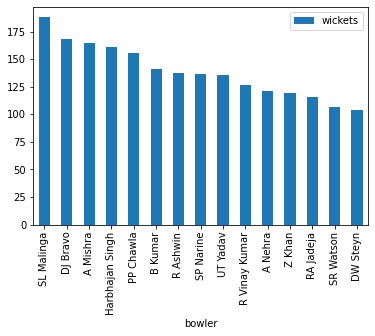

In [19]:
bowler_wickets_df.iloc[:15,:].plot('bowler', 'wickets', kind = 'bar')

#### Dismissal Kinds of some good bowlers

In [20]:
bowler_wickets[bowler_wickets['bowler'] == 'SL Malinga'].dropna()['dismissal_kind'].value_counts()

caught               91
bowled               63
run out              18
lbw                  11
caught and bowled     5
Name: dismissal_kind, dtype: int64

In [21]:
bowler_wickets['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

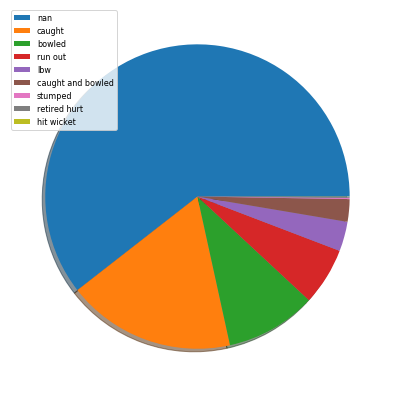

In [22]:
fig = plt.figure(figsize =(10, 7))
plt.pie(bowler_wickets['dismissal_kind'].value_counts(), shadow = True)
plt.legend(bowler_wickets['dismissal_kind'].unique(),loc = 'upper left', fontsize = '8' )

### Conclusions

These are some of conclusions drawn after the exploratory data analysis of the datasets

* Over the years Teams Mumbai Indians, Chennai Super Kings and Kolkata Knight riders are the one who have maximum no of matches. Their performance is outstanding. 

* Royal Challengers, Mumbai Indians, Kings XI Punjab have some really good batsmans beacuse of which these teams have made huge scores by hitting six and fours.

* Talking about batsman, CH Gayle, AB de Villiers, DA Warner, Virat Kohli, MS Dhoni have done marvellous job by making huge scores, hitting maximum no of sixes and winning title of Player of Match many times. These are some of the good players that a company can endorse for its products.

* It has been observed that maximum times when teams win toss they prefer taking fielding first and this is major factor which has contributed in winning the match

* Talking about bowlers, SL Malinga has done very good job and has taken maximum wickets in the matches.

* Most of times players are dismissed either by catch or bowled.